In [1]:
!pip install stocktrends

  Preparing metadata (setup.py) ... done
  Created wheel for stocktrends: filename=stocktrends-0.1.5-py3-none-any.whl size=5248 sha256=adb0d0b95cf267ec418caf472f3eaab69e9034626513ce56e4059a008f79031b
  Stored in directory: /root/.cache/pip/wheels/95/eb/8e/e9209074104baa9471a9afdea19989fbc76d7276522f3dbca1
Successfully built stocktrends


In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib
import datetime
import dateutil
from stocktrends import Renko

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Aug-1ToAug-15.txt')

In [5]:
ticker = 'NQ Aug-1ToAug-15';

In [6]:
# Create a column called date comibing Date and Time
df['date'] = pd.to_datetime(df.Date + ' ' + df.Time)


In [11]:
# drop Date and Time
df = df.drop(['Date', 'Time'], axis=1)

In [12]:
# Function to convert ohlc data into renko bricks. Pass dataframe name and brick size
def df_to_renko(data, n):
    data.reset_index(inplace=True)
    data.columns = [i.lower() for i in data.columns]
    print(data.isnull().values.any())
    df = Renko(data)
    df.brick_size = n
    renko_df = df.get_ohlc_data()
    return renko_df

In [13]:
r_bars = df_to_renko(df, 50)
print('# of rows in DF:',len(r_bars))

False
# of rows in DF: 296


In [14]:
r_bars.head()

,date,open,high,low,close,uptrend
0,2024-07-31 18:00:05,19500.0,19550.0,19500.0,19550.0,True
1,2024-07-31 18:01:20,19550.0,19600.0,19550.0,19600.0,True
2,2024-07-31 19:14:15,19600.0,19650.0,19600.0,19650.0,True
3,2024-07-31 20:12:20,19650.0,19700.0,19650.0,19700.0,True
4,2024-08-01 02:58:25,19650.0,19650.0,19600.0,19600.0,False


In [15]:
# Takes just the open and close columns from the Renko open/high/low/close dataframe
new_df = r_bars[['open','close']]

In [16]:
plt.rcParams["figure.figsize"] = (18,9)

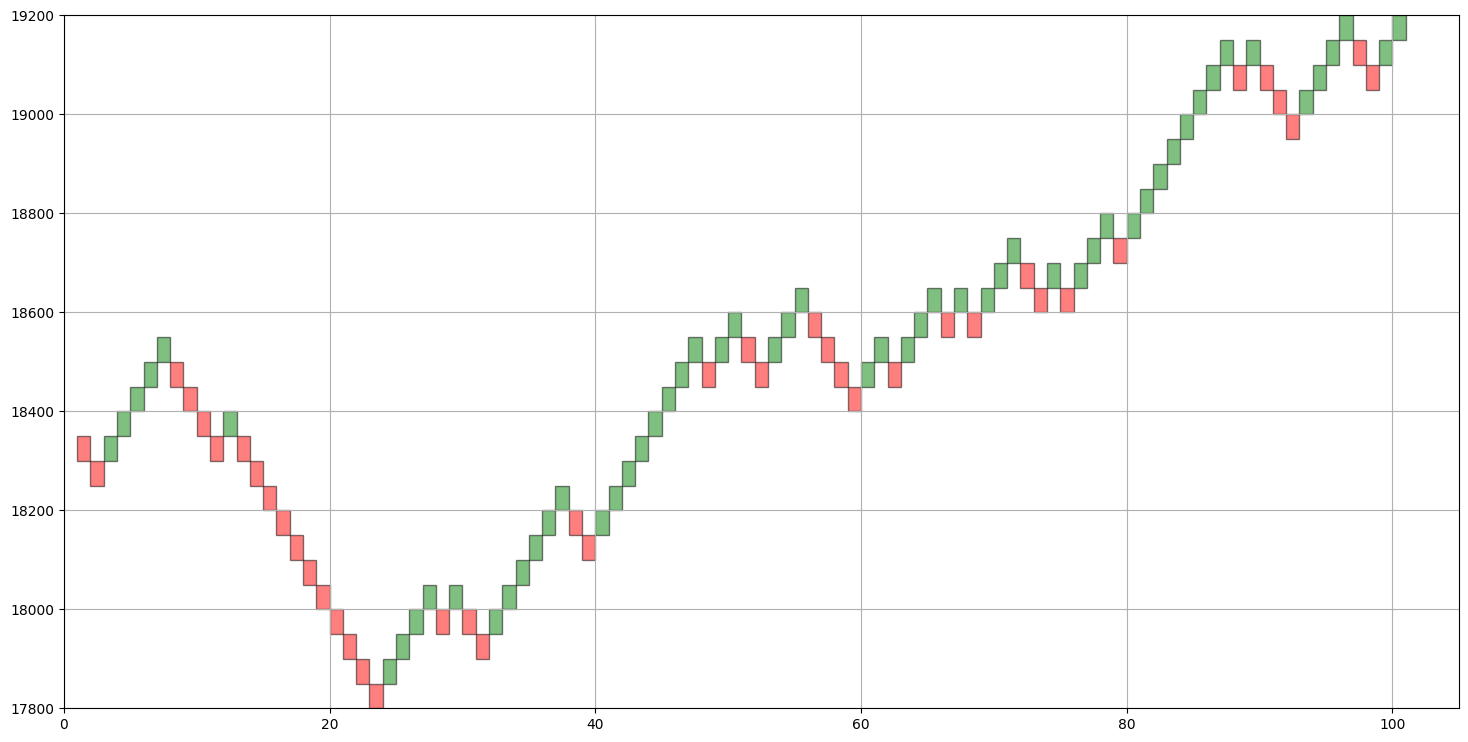

In [17]:
# create the figure
fig = plt.figure(1)
fig.clf()
axes = fig.gca()

# Add 10 extra spaces to the right
num_bars = 100
df = new_df.tail(num_bars)

renkos = zip(df['open'],df['close'])
# plot the bars, green for 'up', red for 'down'
index = 1

for open_price, close_price in renkos:
    if (open_price < close_price):
        renko = matplotlib.patches.Rectangle((index,open_price), 1, close_price-open_price, edgecolor='black', facecolor='green', alpha=0.5)
        axes.add_patch(renko)
    else:
        renko = matplotlib.patches.Rectangle((index,open_price), 1, close_price-open_price, edgecolor='black', facecolor='red', alpha=0.5)
        axes.add_patch(renko)
    index = index + 1

#adjust the axes
plt.xlim([0, num_bars+5])
plt.ylim([min(min(df['open']),min(df['close'])), max(max(df['open']),max(df['close']))])
plt.grid(True)
plt.show()